In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, datasets
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model
import pickle




In [ ]:
!pip install tensorflow==2.16.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 31.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [ ]:

print(tf.__version__)

2.15.0


In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
#X_train
train_images.shape
#y_train
train_labels.shape

(60000,)

In [ ]:
test_images.shape

(10000, 28, 28)

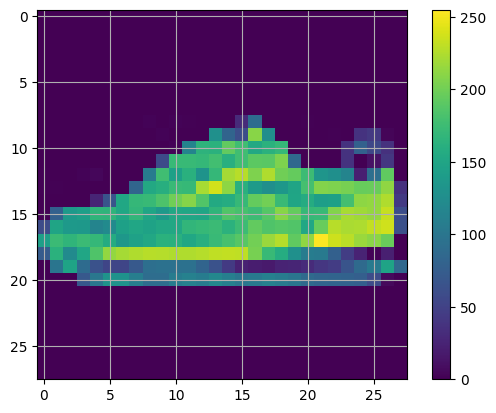

In [ ]:
plt.figure()
plt.imshow(train_images[52])
plt.colorbar()
plt.grid(True)
plt.show()

In [ ]:
#Normalize
train_images = train_images / 255.0
test_images = test_images / 255.0

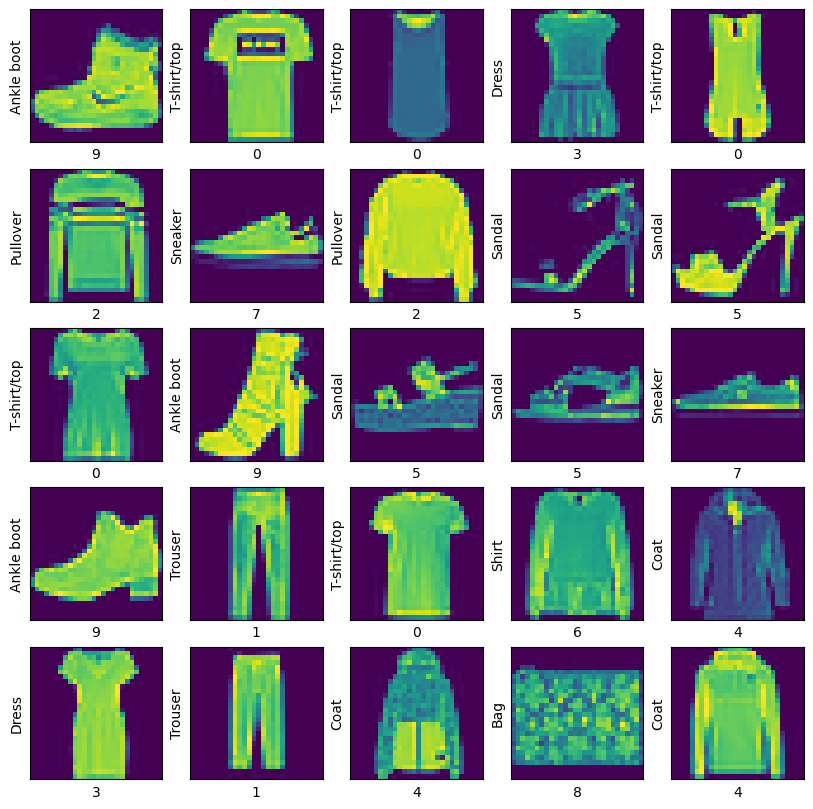

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.ylabel(class_names[train_labels[i]])
    plt.xlabel(train_labels[i])
plt.show()

In [ ]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=(28, 28)),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(10)
# ])

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(576, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 batch_normalization_10 (Ba  (None, 26, 26, 64)        256       
 tchNormalization)                                               
                                                                 
 dropout_10 (Dropout)        (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 batch_normalization_11 (Ba  (None, 11, 11, 64)       

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(1e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

callback1=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,restore_best_weights=True)
callback2=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10,restore_best_weights=True)

In [ ]:
hist = model.fit(train_images, train_labels, epochs=50,validation_data=(test_images,test_labels), callbacks=[callback1,callback2])

Epoch 1/50
1875/1875 [==============================] - 13s 6ms/step - loss: 0.8735 - accuracy: 0.7048 - val_loss: 0.6097 - val_accuracy: 0.7882
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5179 - accuracy: 0.8144 - val_loss: 0.5174 - val_accuracy: 0.8160
Epoch 3/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4497 - accuracy: 0.8386 - val_loss: 0.4637 - val_accuracy: 0.8353
Epoch 4/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4098 - accuracy: 0.8538 - val_loss: 0.4456 - val_accuracy: 0.8360
Epoch 5/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3862 - accuracy: 0.8615 - val_loss: 0.4133 - val_accuracy: 0.8467
Epoch 6/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3660 - accuracy: 0.8676 - val_loss: 0.4100 - val_accuracy: 0.8476
Epoch 7/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3505 - accuracy: 0.8735 - val_loss: 0.3982 - val_ac

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2648 - accuracy: 0.9072 - 644ms/epoch - 2ms/step

Test accuracy: 0.9071999788284302


In [ ]:
def PlotAccuracy(net):
  plt.figure(figsize=(10, 4))
  plt.subplot(1,2,1)
  plt.plot(net.history['val_accuracy'],label='Test Accuracy')
  plt.plot(net.history['accuracy'],label='Accuracy')
  plt.title("Train and Test Accuracy")
  plt.ylabel('Accuracy')
  plt.xlabel('epochs')
  plt.legend()
  plt.plot()


  plt.subplot(1,2,2)
  plt.plot(net.history['loss'], label= 'Train Loss')
  plt.plot(net.history['val_loss'], label= 'Test Loss')
  plt.title("Train Loss")
  plt.ylabel('Loss')
  plt.xlabel('epochs')
  plt.legend()
  plt.show()
  plt.tight_layout()

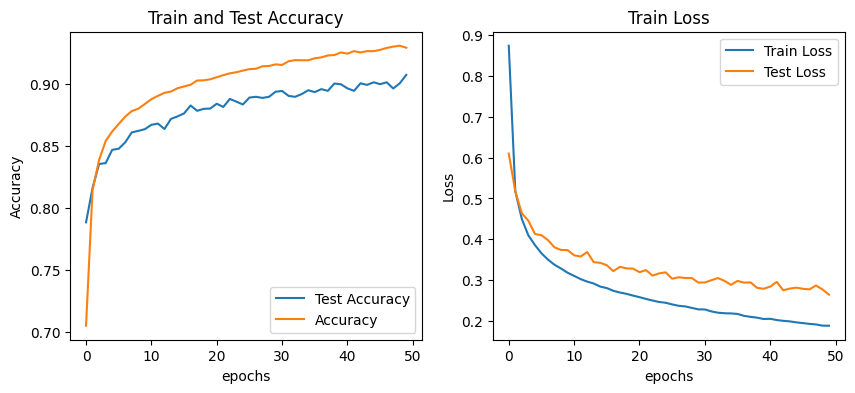

<Figure size 640x480 with 0 Axes>

In [ ]:
PlotAccuracy(hist)

In [ ]:
model.save('fashion_mnist_model.keras')

NameError: name 'model' is not defined

In [ ]:
model = load_model('fashion_mnist_model.keras')


In [ ]:
print(model.evaluate(test_images,test_labels))

NameError: name 'test_images' is not defined